# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Part 1a: Are there any missing values in the dataset?
- Part 1b: How are the predictor variables related to the outcome variable?
- Part 1c: What is the correlation between the predictor variables?
- Part 1d: What is the distribution of each predictor variable?
- Part 1e: Predictor Variable Analysis:
    - Are there any outliers in the predictor variables?
    - How are the predictor variables related to each other?
    - Is there any interaction effect between the predictor variables?
    - Are there any differences in the predictor variables between males and females (if gender information is available)?
- Part 1f: Specific Averages:
    - What is the average age of the individuals in the dataset?
    - What is the average glucose level for individuals with diabetes and without diabetes?
    - What is the average BMI for individuals with diabetes and without diabetes?
- Part 1g: How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?

## Part 1 Preliminary Stage: Imports

In [2]:
# Imports
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns


# Csv
diabetes_df = pd.read_csv(r'diabetes.csv')

## Part 1 Preliminary Stage: Model Description and Assumptions

This project will employ a logistic regression model where the assumptions for this type of model are:

    Source: https://data.compass.lighthouselabs.ca/p/7/days/w05d3/activities/2297

    1. Data should be independent and random (each random variable has the same probability distribution).

    2. The response variable y does not need to be normally distributed, but the distribution is from an exponential family (e.g. binomial, Poisson, multinomial, normal)

    3. The original response variable need not have a linear relationship with the independent variables, but the transformed response variable (through the link function) is linearly dependent on the independent variables

### Assumptions applied

    1. The diabetes dataset contains oberservatons that are independent of each other
    2. The response variable, "Outcome", is binomial
    3. This will be checked later, where the link function is the logit function




 ## Part 1a: Are there any missing values in the dataset?

In [3]:
diabetes_df.shape
# Result: 768 records, 9 attributes

diabetes_df.dtypes
# Result: All but BMI and PedigreeFunction are Integers

diabetes_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# filter dataframe for zero values
diabetes_df_BMI_0 = diabetes_df[diabetes_df['BMI'] == 0]
diabetes_df_BP_0 = diabetes_df[diabetes_df['BloodPressure'] == 0]
diabetes_df_ST_0 = diabetes_df[diabetes_df['SkinThickness'] == 0]

# Print the counts
print(f"There are {len(diabetes_df_BMI_0)} records containing 0 BMI")
print(f"There are {len(diabetes_df_BP_0)} records containing 0 BloodPressure")
print(f"There are {len(diabetes_df_ST_0)} records containing 0 SkinThickness")



There are 11 records containing 0 BMI
There are 35 records containing 0 BloodPressure
There are 227 records containing 0 SkinThickness


### Part 1a Answer
    No nulls, but there are values of zero for BloodPresure, Skin Thickness, and BMI that must be addressed

## Part 1b: How are the predictor variables related to the outcome variable?

#### Source 1: https://www.niddk.nih.gov/health-information/diabetes/overview

__Outcome__: Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high.  The most common types of diabetes are type 1, type 2, and gestational diabetes.

__Gluscose__: The main sugar found in your blood and your body's primary source of energy. Also called blood sugar.  Prediabetes means your blood glucose levels are higher than normal but not high enough to be diagnosed as diabetes. Prediabetes usually occurs in people who already have some insulin resistance or whose beta cells in the pancreas aren’t making enough insulin to keep blood glucose in the normal range. Without enough insulin, extra glucose stays in your bloodstream rather than entering your cells. Over time, you could develop type 2 diabetes.

__Insulin__: A hormone made by your pancreas that helps your body use glucose (blood sugar) for energy. Insulin helps to control blood glucose levels.  If you have type 1 diabetes, your body makes little or no insulin.

__Pregnancy__: Gestational diabetes is a type of diabetes that occurs only during pregnancy.  During pregnancy, your body makes special hormones and goes through other changes, such as weight gain. Because of these changes, your body’s cells don’t use insulin well, a condition called insulin resistance.  Being overweight or having obesity is linked to gestational diabetes. Women who are overweight or have obesity may already have insulin resistance when they become pregnant. Gaining too much weight during pregnancy may also be a factor. 

__BMI__: Risk factor for type 2 diabetes - overwight or have obesity.  Most (difference may come down to race, which is not measured in dataset) adults with a BMI of 25 or higher are overweight and have a higher risk of developing type 2 diabetes.  BMI is calculated differently for 19 and younger, but the youngest in our dataset is 21 years old.  BMI cannot distinguish between fat and muscle, so the terms overweight and obese over BMI 25 is not a hard rule.

__Age__: Risk factor for type 2 diabetes - are age 35 or older.


#### Source 2: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8306487

__Pregnancy__: The main risk factors of diabetes includes previous history of gestational diabetes (during pregnancy). 

"Our analysis finds five main predictors of diabetes: glucose, pregnancy, body mass index, age, and diabetes pedigree function."


In [5]:
# Descriptive Stats for No Diabetes diagnosis
diabetes_df_outcome_0 = diabetes_df[diabetes_df['Outcome'] == 0]
diabetes_df_outcome_0 = diabetes_df_outcome_0.drop(columns='Outcome')
diabetes_df_outcome_0.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000


In [6]:
# Descriptive Stats for Diabetes diagnosis
diabetes_df_outcome_1 = diabetes_df[diabetes_df['Outcome'] == 1]
diabetes_df_outcome_1 = diabetes_df_outcome_1.drop(columns='Outcome')
diabetes_df_outcome_1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000


### Part 1b Answer
    When comparing the diabetes diagnosis, BMI is 5 points higher on average, which corresponds with the overweight/obesity risk factor, and Age is 6 years older on average, which corresponds with the over 35 higher risk of having diabetes.

## Part 1c: What is the correlation between the predictor variables?

<Axes: >

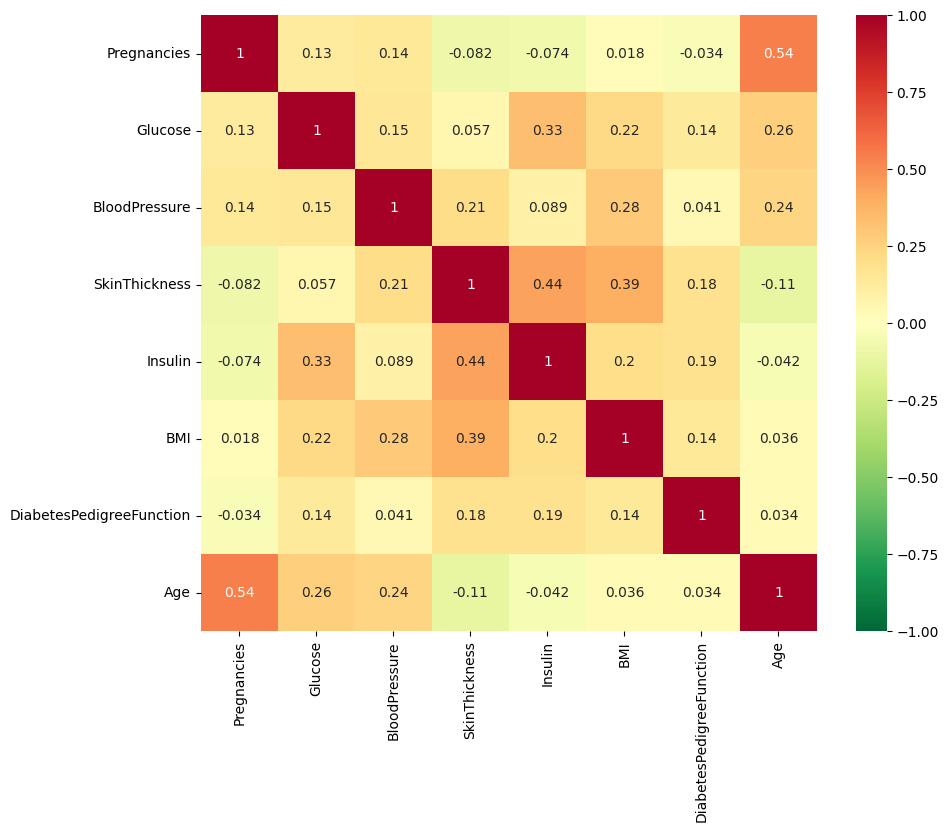

In [7]:
X = diabetes_df.drop(columns=['Outcome'])

# correlation matrix 
# Source: https://data.compass.lighthouselabs.ca/p/7/6603399c-6f1e-44e7-8163-75e126ac95c0
# Source: https://seaborn.pydata.org/generated/seaborn.heatmap.html
corrmat = X.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, square=True,cmap="RdYlGn_r", annot=True, vmin=-1, vmax=1)


### Part 1c Answer
    Multicolinearity Assessment
    
    Source: Table 1 (medicine column) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6107969/
    
    Age and Pregnancies have the highest correlation at 0.54 -> fair in strength.
    Insulin and Skin Thickness at 0.44 -> fair in strength
    BMI and Skin Thickness at 0.39 -> fair in strength
    Insulin and Glucose at 0.33 -> fair in strength

    I interpret that there is no strong multicolinearity.  Therefore, no columns need be removed from the model.


## Part 1d: What is the distribution of each predictor variable?

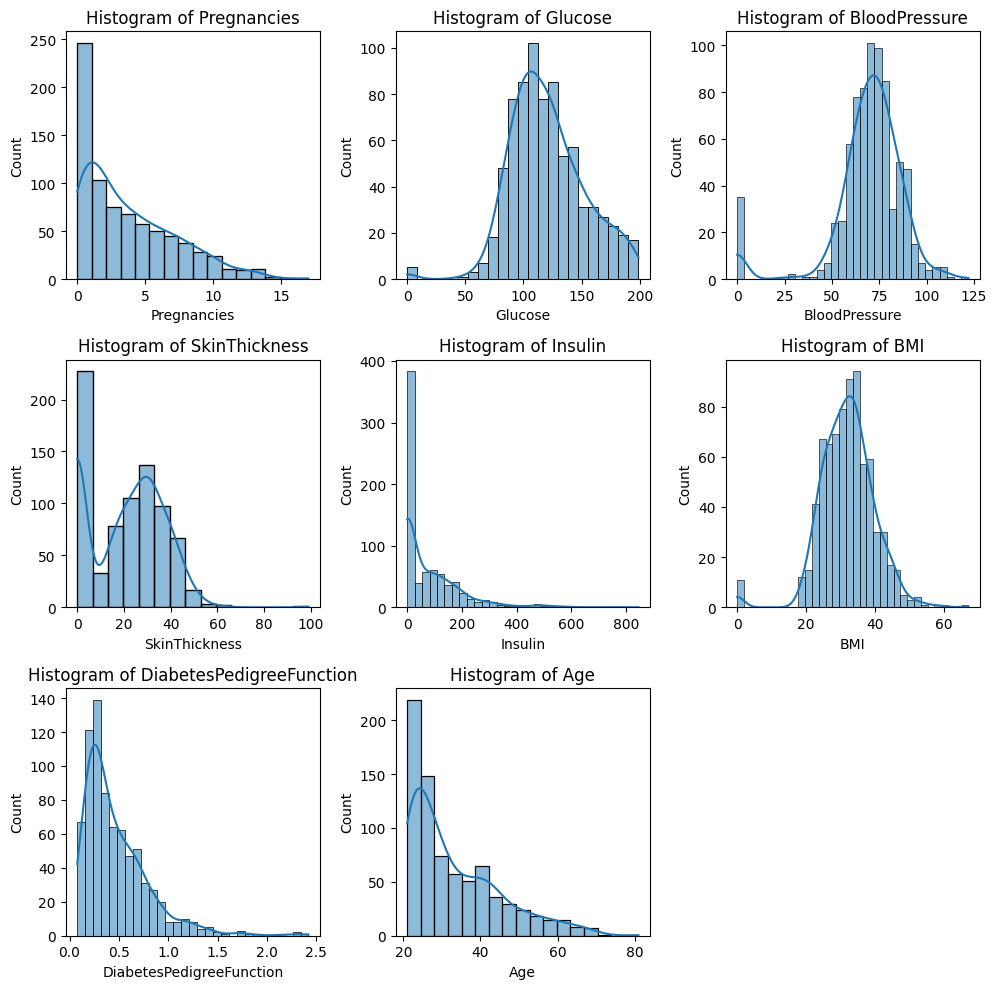

In [8]:
# Create a list of column names
X_columns = X.columns.to_list()

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# Flatten the axes for iteration
axes = axes.flatten()

# Loop through column names and create histograms
for row, column in enumerate(X_columns):
    ax = axes[row]
    sns.histplot(X[column], kde=True, ax=ax)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)

# Remove last subplot that is empty
fig.delaxes(axes[8])

# Adjust layout and show
plt.tight_layout()
plt.show()

### Part 1d Answers
    Pregnacies -> right Skewed
    Glucose -> Gaussian
    Blood Pressure -> Gaussian (must remove 0 values)
    BMI-> Gaussian (must remove 0 values)
    Skin Thickness-> normal with the exception of 0, which is a large amount 200+ of the dataset.
    Insulin ->
    Diabetes Pedigree Function -> Right Skewed
    Age -> Right Skewed

## Part 1e: Predictor Variable Analysis:

### Are there any outliers in the predictor variables?
    In addition to the zero values found during Part 1a and looking at the histograms above, most attributes have outliers at the extremes of their skewness.  This will be dealt with the IQR formula in Part II.

### How are the predictor variables related to each other?

    Based on what was said in the description of the predictor variables to the outcome variable, each of the predictor variables that showed a fair strength of correlation make sense to do so logically.  As each body is different, the relationship between the values is conceptual, not fixed to unit of measurement e.g. Age and Pregnancies makes sense with older people having more children, but there is no fixed age that some one has their first or 17th baby.

### Is there any interaction effect between the predictor variables?

    Age and Pregnancies have the highest correlation at 0.54 -> fair in strength.
    Insulin and Skin Thickness at 0.44 -> fair in strength
    BMI and Skin Thickness at 0.39 -> fair in strength
    Insulin and Glucose at 0.33 -> fair in strength

### Are there any differences in the predictor variables between males and females (if gender information is available)?
    Not specifically to male and females in my research.  It would be between those who have been pregnant and those who haven't, and even with those who are/have been pregnant, we do not have the data that specifies whether they have/had gestational diabetes at the time of pregnancy, which is a contributor/predictor for type 2 diabetes in the future.





## Part 1f: Specific Averages:

In [9]:
# What is the average age of the individuals in the dataset?
diabetes_df_age_mean = diabetes_df['Age'].mean()
print(f"The average age of the individuals in the dataset is {diabetes_df_age_mean}")

# What is the average glucose level for individuals with diabetes and without diabetes?
diabetes_df_outcome_0_glucose_mean = diabetes_df_outcome_0['Glucose'].mean()
print(f"The average glucose level of the individuals without diabetes {diabetes_df_outcome_0_glucose_mean}")

# What is the average BMI for individuals with diabetes and without diabetes?
diabetes_df_outcome_1_glucose_mean = diabetes_df_outcome_1['Glucose'].mean()
print(f"The average glucose level of the individuals with diabetes {diabetes_df_outcome_1_glucose_mean}")

The average age of the individuals in the dataset is 33.240885416666664
The average glucose level of the individuals without diabetes 109.98
The average glucose level of the individuals with diabetes 141.25746268656715


## Part 1g: How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?

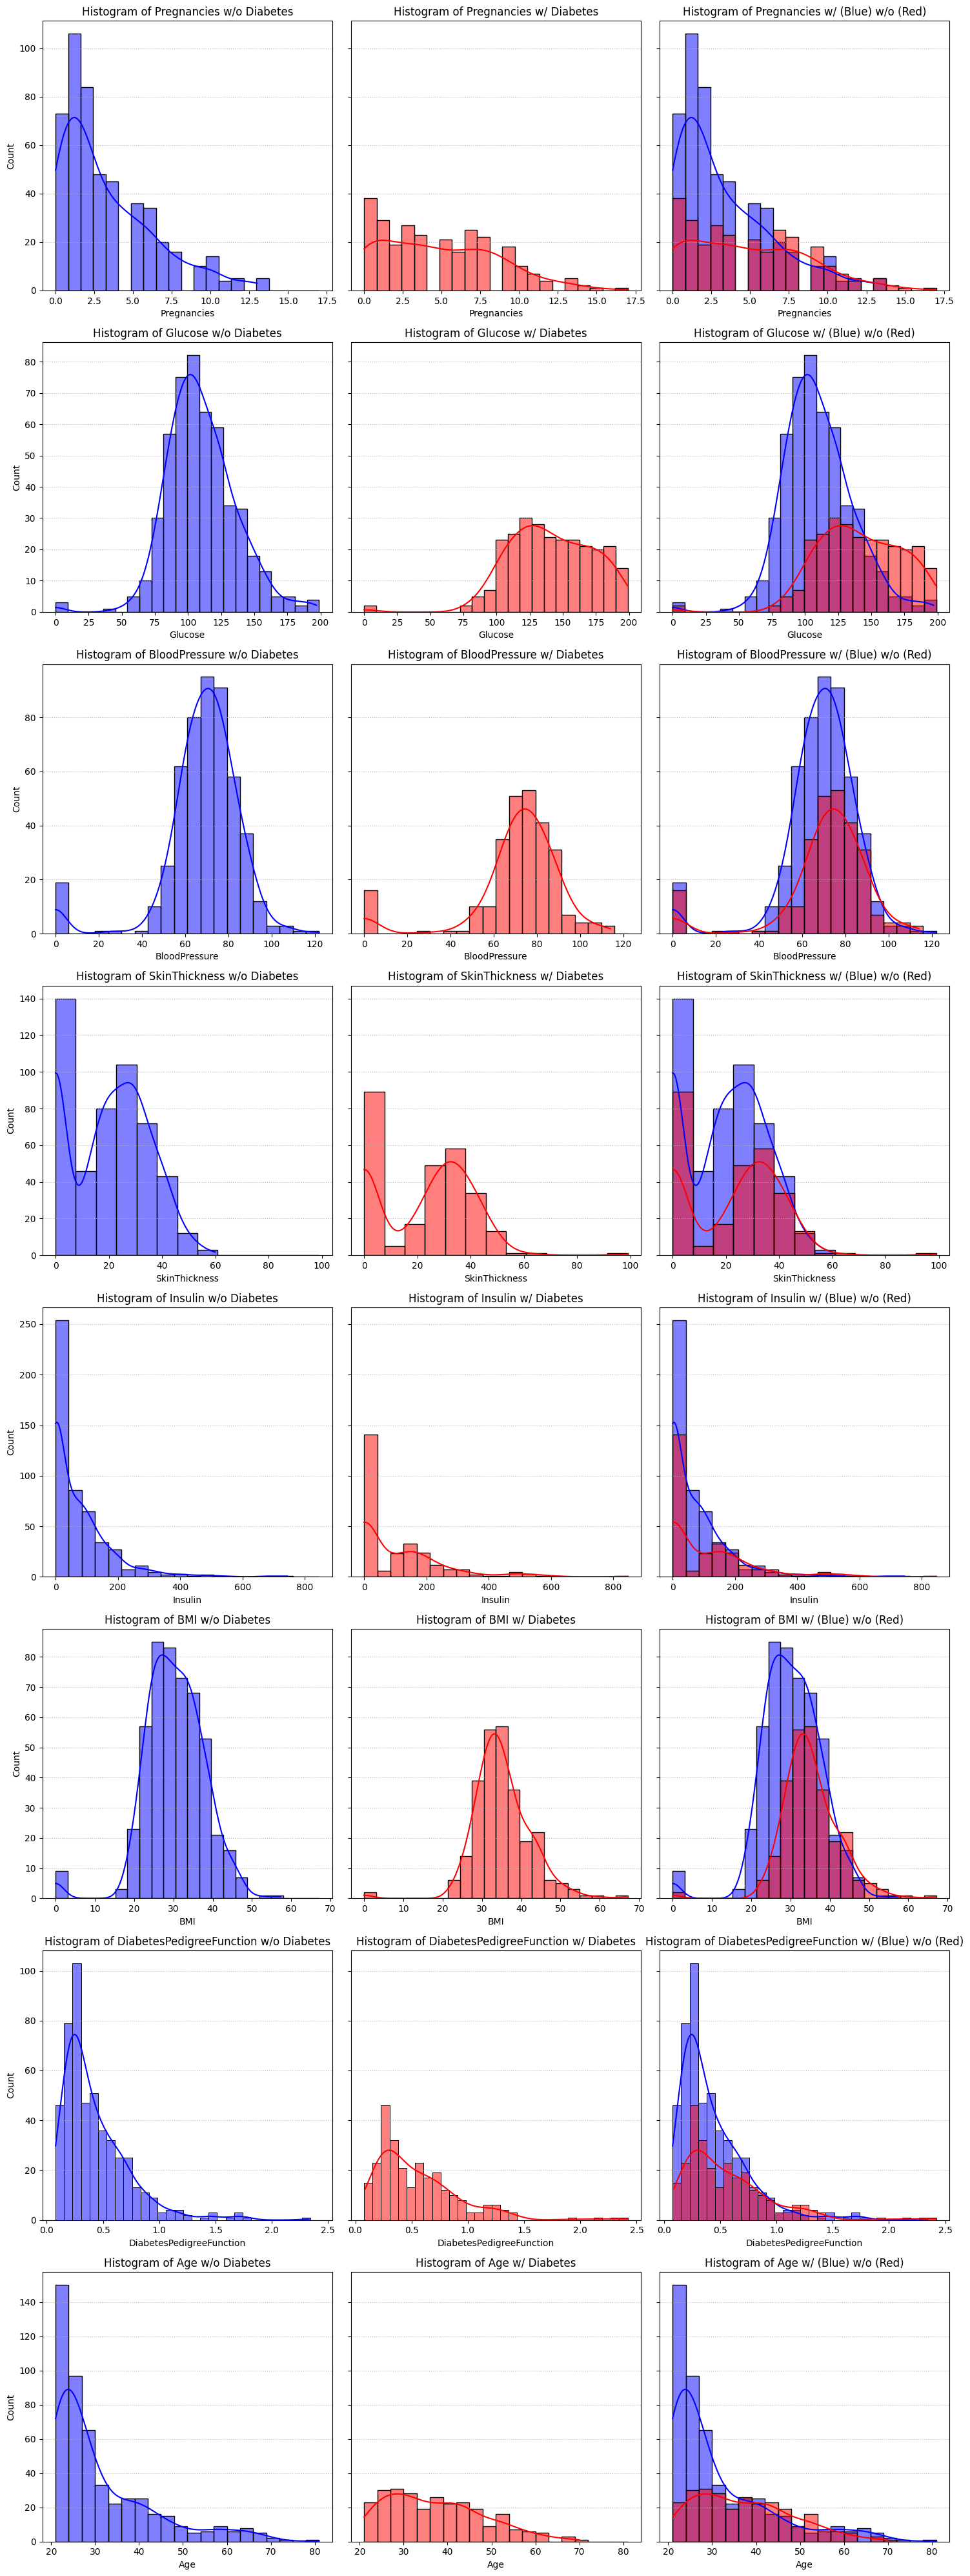

In [10]:
# Create subplots
fig, axes = plt.subplots(8, 3, figsize=(15, 40), sharex='row', sharey='row')

# Loop through column names and create histograms
for i, (column1, column2) in enumerate(zip(diabetes_df_outcome_0.columns, diabetes_df_outcome_1.columns)):
    
    # Calculate min and max values between the two dataframes
    min_value = min(diabetes_df_outcome_0[column1].min(), diabetes_df_outcome_1[column2].min())
    max_value = max(diabetes_df_outcome_0[column1].max(), diabetes_df_outcome_1[column2].max())

    # Calculate IQR for the two dataframes
    iqr1 = np.percentile(diabetes_df_outcome_0[column1], 75) - np.percentile(diabetes_df_outcome_1[column1], 25)
    iqr2 = np.percentile(diabetes_df_outcome_0[column2], 75) - np.percentile(diabetes_df_outcome_1[column2], 25)
    max_iqr = max(iqr1, iqr2)

    # Calculate the bin width using the Freedman-Diaconis rule
    n = len(diabetes_df_outcome_0)
    bin_width1 = 2 * max_iqr / np.power(n, 1/3)
    
    # Calculate the bin width using a maximumm of 20 bins
    bin_width2 = int((max_value - min_value) / 20)

    # If there are too many bins with the Freedman-Diaconis rule, use 20 bins instead
    bin_width = max(bin_width1, bin_width2)

    # bin_width = max_value/10
    binrange = (min_value, max_value)

    # Plot Without
    ax1 = axes[i,0]
    sns.histplot(diabetes_df_outcome_0[column1], color='blue', kde=True, ax=ax1, binwidth = bin_width, binrange=binrange)
    ax1.set_title(f'Histogram of {column1} w/o Diabetes')
    ax1.set_xlabel(column1)

    # Plot With
    ax2 = axes[i,1]
    sns.histplot(diabetes_df_outcome_1[column2], color='red', kde=True, ax=ax2, binwidth = bin_width, binrange=binrange)
    ax2.set_title(f'Histogram of {column2} w/ Diabetes')
    ax2.set_xlabel(column2)
    
    # Plot Both
    ax3 = axes[i,2]
    sns.histplot(diabetes_df_outcome_0[column1], kde=True, ax=ax3, color='blue', label='Without Diabetes', binwidth = bin_width, binrange=binrange)
    sns.histplot(diabetes_df_outcome_1[column2], kde=True, ax=ax3, color='red', label='With Diabetes', binwidth = bin_width, binrange=binrange)
    ax3.set_title(f'Histogram of {column1} w/ (Blue) w/o (Red)')
    ax3.set_xlabel(column1)

    # Add grid dotted lines for Y-axis
    ax1.yaxis.grid(True, linestyle=':', alpha=0.9)
    ax2.yaxis.grid(True, linestyle=':', alpha=0.9)
    ax3.yaxis.grid(True, linestyle=':', alpha=0.9)


    
# Adjust layout and show
plt.tight_layout()
plt.show()

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Part IIa: Handling missing values
- Part IIb: Handling outliers
- Part IIc: Scaling and normalization
- Part IId: Feature Engineering & Handling imbalanced data

## Part IIa: Handling missing values
    No null values
    Remove 0 values from BMI and Blood Pressure.
    Considering the number observations where Skin Thickness is zero, I will not be removing this data in the hopes that this column will not be used in the final model


In [11]:
# Remove null values
diabetes_df_no_nulls = diabetes_df[(diabetes_df['BMI']>0) & (diabetes_df['BloodPressure']>0)]

print(f"Of {len(diabetes_df)} records, {len(diabetes_df) - len(diabetes_df_no_nulls)} were removed")

Of 768 records, 39 were removed


## Part IIb: Handling outliers
    For this, I'll be using the statistical outlier detection of quartile plus/minus 1.5*IQR

In [12]:
# Stage clean dataframes of the data
diabetes_df_no_outliers = diabetes_df_no_nulls

def outliers (column_name): 
    """
    Function to remove outliers based on rating, review_count, and distance
    """
    global diabetes_df_no_outliers

    # Establish Outlier Measurements
    Q1 = diabetes_df_no_outliers[column_name].quantile(0.25)
    Q3 = diabetes_df_no_outliers[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove Outliers from Clean Dataframe
    diabetes_df_no_outliers = diabetes_df_no_outliers[(diabetes_df_no_outliers[column_name] >= lower_bound) & (diabetes_df_no_outliers[column_name] <= upper_bound)]

    # Print the number of outliers removed
    num_outliers_removed =  len(diabetes_df_no_nulls) - len(diabetes_df_no_nulls[(diabetes_df_no_nulls[column_name] >= lower_bound) & (diabetes_df_no_nulls[column_name] <= upper_bound)])
    print(f"{num_outliers_removed} outliers of {len(diabetes_df_no_nulls)} records removed from the {column_name} column")

# Run the outlier removal functions
for i in X_columns:
    outliers(i)

print(f"A total of {len(diabetes_df_no_nulls) - len(diabetes_df_no_outliers)} of {len(diabetes_df_no_nulls)} records were removed")

4 outliers of 729 records removed from the Pregnancies column
5 outliers of 729 records removed from the Glucose column
14 outliers of 729 records removed from the BloodPressure column
1 outliers of 729 records removed from the SkinThickness column
27 outliers of 729 records removed from the Insulin column
10 outliers of 729 records removed from the BMI column
28 outliers of 729 records removed from the DiabetesPedigreeFunction column
14 outliers of 729 records removed from the Age column
A total of 96 of 729 records were removed


## Part IIc: Scaling and normalization

    Source: https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff
    
    As most of the variables are not gaussian in distribution, I will be using normalization (Min/Max default 0 to 1) for each of the predictor variables

##  Part IId: Feature Engineering & Handling imbalanced data

    No need to produce dummy variables as there are no categorical predictors. The imbalance of data was rectified by using stratify when splitting the dataset, and further in Part III, it is addressed with StratifiedKFold.  Considering low number of features, I will not employ a feature reduction method like PCA and instead use a feature selection method in Part III.  I will Feature Engineer the interaction terms, the quadratic, the reciprical, and the log transformations of each variable and add them to the list of predictors.

In [13]:

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import  MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import set_config
from sklearn.model_selection import train_test_split

# Stage X and y
X_predictors = diabetes_df_no_outliers.drop(columns=['Outcome'])
y_outcome = diabetes_df_no_outliers['Outcome']

# Store the list of columns before processing
X_predictors_columns_list = X_predictors.columns.tolist()

# This is part 1 of the preprocessing pipeline 
class scale_max_min(BaseEstimator, TransformerMixin):
    """
    Takes X predictors, 
    applies the maxminscaler
    returns scaled dataframe
    """
        
    # Must include this fit, though I has NO effect
    def fit(self, X, y=None):
        return self

    def transform(self, X):

        # Copy original Dataframe
        X_scaled_df = X.copy()

        # assign scaler
        X_scale = MinMaxScaler()

        # Calculate scaled data
        X_scale_values = X_scale.fit_transform(X_scaled_df)
        X_scale_columns = X_scale.get_feature_names_out(input_features=X_scaled_df.columns)

        # Change it to a dataframe
        X_transform_scaled_df = pd.DataFrame(data=X_scale_values, columns=X_scale_columns)

        return X_transform_scaled_df


# This is part 2a of the preprocessing pipeline 
class transformtions_poly(BaseEstimator, TransformerMixin):
    """
    Takes scaled dataframe, 
    applies polynomial transformations, 
    returns polynomila features dataframe
    """
    # 
    def __init__(self, columns=None):
        self.polynomial_features_columns = None
        self.columns=columns 
        
    # Must include this fit, though I has NO effect
    def fit(self, X, y=None):
        return self

    def transform(self, X):

        # Copy original Dataframe
        X_transform_poly = X.copy()
        
        polynomial_features = PolynomialFeatures(
            2, # number of degrees, where 2 is the quadratic level
             include_bias=False # remove the "1"
        )

        # Calculate Polynomials
        polynomial_features_values = polynomial_features.fit_transform(X_transform_poly)
        self.polynomial_features_columns = polynomial_features.get_feature_names_out(input_features=X_transform_poly.columns)

        # Change it to a dataframe
        polynomial_features_df = pd.DataFrame(data=polynomial_features_values, columns=self.polynomial_features_columns)

        return polynomial_features_df
    
    def get_feature_names_out(self, input_features=None):
        return self.polynomial_features_columns


# This is part 2b of the preprocessing pipeline 
class transformtions_log_reciprocal(BaseEstimator, TransformerMixin):
    """
    Takes polynomial_features_df, 
    filters to the original columns, 
    applies the log and reciprocal transformations, 
    returns polynomial_features, log, and reciprocal transformations dataframe
    """
    def __init__(self, columns=None):
        self.X_transformtions_log_reciprocal_columns = None
        self.columns=columns 
        
    # Must include this fit, though I has NO effect
    def fit(self, X, y=None):
        return self

    def transform(self, X):

        # Copy Original X Dataframe  
        X_transform = X[X_predictors_columns_list].copy()

        # Create empty dataframe for newly transformed columns
        X_transformtions_log_reciprocal = pd.DataFrame()

        #Loop through the original X Columns 
        for column in X_transform:
            
            #Apply the Log Transformation, add a very small value to make values non-zero
            X_transformtions_log_reciprocal[f'{column}_log'] = np.log(X_transform[column] + 1e-20)

            #Apply the reciprocal Transformation, add a very small value to make values non-zero
            X_transformtions_log_reciprocal[f'{column}_reciprocal'] = 1 / (X_transform[column] + + 1e-20)

        # Store Column Names
        self.X_transformtions_log_reciprocal_columns = X_transformtions_log_reciprocal.columns.tolist()
        
        return X_transformtions_log_reciprocal
    
    def get_feature_names_out(self, input_features=None):
        return self.X_transformtions_log_reciprocal_columns
    
    

# Create Feature Union of parts 2a and 2b
union_transformations = FeatureUnion([

    # Part 2a
    ("transformtions_poly", transformtions_poly()),

    # Part 2b
    ("transformtions_log_reciprocal", transformtions_log_reciprocal())
])

# the Preprocessing Pipeline
pipeline_transformation = Pipeline([

    # Preprocessing - Scaling
    ('scaler', scale_max_min()),

    # Preprocessing - Feature Engineering
    ('union_transformations', union_transformations)
])

# Run the Preprocessing Pipeline, which returns a processed predictors dataframe
X_predictors_preprocessed_values = pipeline_transformation.fit_transform(X_predictors, y_outcome)
X_predictors_preprocessed_columns = pipeline_transformation.steps[-1][1].get_feature_names_out(input_features=X_predictors.columns)
X_predictors_preprocessed_df = pd.DataFrame(data=X_predictors_preprocessed_values, columns = X_predictors_preprocessed_columns)

# Split and stratify by y as there is an imbalance of values counts in the "Outcome"
X_train, X_test, y_train, y_test = train_test_split(X_predictors_preprocessed_df, y_outcome, test_size=0.2, random_state=42, stratify=y_outcome)

# Iterate through the column names and remove the union the prefixes
for column_name in X_predictors_preprocessed_df.columns:
    if column_name.startswith('transformtions_poly__'):
        X_predictors_preprocessed_df.rename(columns={column_name: column_name[len('transformtions_poly__'):]}, inplace=True)
    if column_name.startswith('transformtions_log_reciprocal__'):
        X_predictors_preprocessed_df.rename(columns={column_name: column_name[len('transformtions_log_reciprocal__'):]}, inplace=True)

set_config(display='diagram')
display(pipeline_transformation)

# display of the predictors going into the Model
X_predictors_preprocessed_df.info()


Pipeline(steps=[('scaler', scale_max_min()),
                ('union_transformations',
                 FeatureUnion(transformer_list=[('transformtions_poly',
                                                 transformtions_poly()),
                                                ('transformtions_log_reciprocal',
                                                 transformtions_log_reciprocal())]))])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 60 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Pregnancies                             633 non-null    float64
 1   Glucose                                 633 non-null    float64
 2   BloodPressure                           633 non-null    float64
 3   SkinThickness                           633 non-null    float64
 4   Insulin                                 633 non-null    float64
 5   BMI                                     633 non-null    float64
 6   DiabetesPedigreeFunction                633 non-null    float64
 7   Age                                     633 non-null    float64
 8   Pregnancies^2                           633 non-null    float64
 9   Pregnancies Glucose                     633 non-null    float64
 10  Pregnancies BloodPressure               633 non-null    float6

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Part IIIa Train the models: Train the selected models on the training set.
- Part IIIb Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Part IIIc Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

## Part IIIa Train the models: 

### Biases
    It is my understanding that the data will not produce a biased result.  One issue may be were a higher number of pregnancies might result in a higher probability of having diabetes - this is not entirely true as insullin resistance may increase during pregnancy that may lead to gestational diabetes, but it is not true for all pregnancies.

### Metrics Used for scoring
    Considering our data is imbalanced and it is imperative to have a high sensitivity due to the nature of medical diagnosis, the metric I will be using is a weighted sum between recall and the f1-score.  A model and the features to select will be based on this highest weighted sum. The recall will return a high rate of true positives but shouldn't be completely fixated on the records of positive cases in the training data.  Therefore, F1-score is put into the mix to balance the selection of features and models.  If I had more time, I would allow for the scorer to work below.  However, I will be using recall for the scorer when selecting the model, and then comparing it with f-score when the scores are printed.

### Ensemble Methods:

##### _Bagging Ensemble using Logistic Regression Model_
        I will be employing all solvers minus newton-cholesky 
##### _SVM Models_
##### _Random Forest and Gradient Boosting Ensembles using Decision Trees_

### Modelling Definitions

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm 
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

# Scoring Value that is callable 
# def model_scorer(estimator, X, y):  

#     y_pred = estimator.predict(X)
#     # Weighted sum of recall and F1-Score
#     # Combined weights can be adjusted, but must be summed to 1
#     model_scorer_recall_weight = 0.7
#     model_scorer_f1_score_weight = 0.3
#     model_scorer_recall = metrics.recall_score(y, y_pred)
#     model_scorer_f1_score = metrics.f1_score(y, y_pred)
#     model_scorer_score = model_scorer_recall_weight * model_scorer_recall  + model_scorer_f1_score_weight * model_scorer_f1_score
#     return model_scorer_score

# define the Kfold that preserves the percentage of samples
# Used in Grid Search and in Feature Selection 
cv_StratifiedKFold = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# This is the list of models and parameters used.  
# These will be used for the feature selection, 
# but will be modified with hypertuning after selection with GridSearchCV
model_estimators = [
    ("Log", BaggingClassifier(LogisticRegression(solver='liblinear')))
    ,('RanForEn', RandomForestClassifier()),
    ('GradBoost', GradientBoostingClassifier()),
    ('SVC', svm.SVC(kernel='linear')),
    ('NuSVC', svm.NuSVC(kernel='linear' )), 
    ('LinearSVC', svm.LinearSVC(dual="auto"))
]

# Define the parameters for hypertuning by grid search
param_grid = {

    # Bagging of Logistic Classifier
    'BaggingClassifier__n_estimators': [10, 20],
    'BaggingClassifier__max_samples': [0.5, 0.7],
    
    #Logistic Regression
    'LogisticRegression__penalty': ['l2', 'none'],
    'LogisticRegression__C': [0.1, 1.0, 10.0],
    # 'LogisticRegression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga', 'sag'],
    'LogisticRegression__max_iter': [100, 200, 300],
    
    # Random Forest
    'RandomForestClassifier__n_estimators': [50, 100],
    'RandomForestClassifier__max_depth': [None, 10],
    'RandomForestClassifier__min_samples_split': [2, 4],
    'RandomForestClassifier__min_samples_leaf': [1, 2],
    'RandomForestClassifier__max_features': ['auto', 'sqrt'],
    
    # Gradien Boosting
    'GradientBoostingClassifier__n_estimators': [50, 100],
    'GradientBoostingClassifier__learning_rate': [0.01, 0.1],
    'GradientBoostingClassifier__max_depth': [5, 6],
    'GradientBoostingClassifier__min_samples_split': [2, 3],
    
    # SVC
    'SVC__C': [0.1, 1.0],
    'SVC__gamma': ['scale', 'auto'],
    
    # NuSvc
    'NuSVC__nu': [0.3, 0.5],
    
    # LinearScv
    'LinearSVC__penalty': ['l1', 'l2'],
    'LinearSVC__C': [0.1, 1.0],
    'LinearSVC__loss': ['hinge', 'squared_hinge'],
    'LinearSVC__max_iter': [1000, 2000]
}



### Part IIIa: Selecting Best Estimators and Features based on Training Data

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import  MinMaxScaler
from sklearn import metrics
from sklearn import svm 
from sklearn.metrics import make_scorer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# Create Empty list to store the various pipelines
pipeline_models_list = []

# Create Empty dictionary to store the best estimators
best_estimators_models = {}
best_estimators_features = {}
best_estimators_params = {}
best_estimators_scores = {}

# Stage the data
X_best_estimators = X_train
y_best_estimators = y_train
  
# For loop creates a pipeline distinct to each model
for name, estimator in model_estimators:


    # # Individual pipeline for a model
    pipeline_best_estimator = Pipeline([

        # Preprocessing - Feature Selection
        ('SequentialFeatureSelector', SequentialFeatureSelector(
            estimator=estimator, # Takes the model as defined earlier (this selection will not be based on hypertuning with grid search)
            n_features_to_select=10,
            tol= None,  
            direction="forward",        
            # scoring= model_scorer, 
            scoring = 'recall',
            cv=cv_StratifiedKFold,  
            n_jobs = None)  # Default
        ),

        # Modeling
        (name, estimator)
    ])

    # Define the Grid Search
    grid_search = GridSearchCV(
            estimator=pipeline_best_estimator, 
            param_grid=param_grid.get(name, {}), 
            cv=cv_StratifiedKFold, 
            n_jobs=-1, # Use all processors
            # scoring= metrics.make_scorer(model_scorer, greater_is_better=True, needs_threshold=True)
            scoring = 'recall'
    )

    # fit pipeline to grid
    grid_search.fit(X_best_estimators, y_best_estimators)

    # Store best_estimators
    best_estimators_models[name] = grid_search.best_estimator_
    best_estimators_features[name] = grid_search.feature_names_in_.tolist()
    best_estimators_params[name] = grid_search.best_params_
    best_estimators_scores[name] = grid_search.best_score_

## Part IIIb: Compare Models

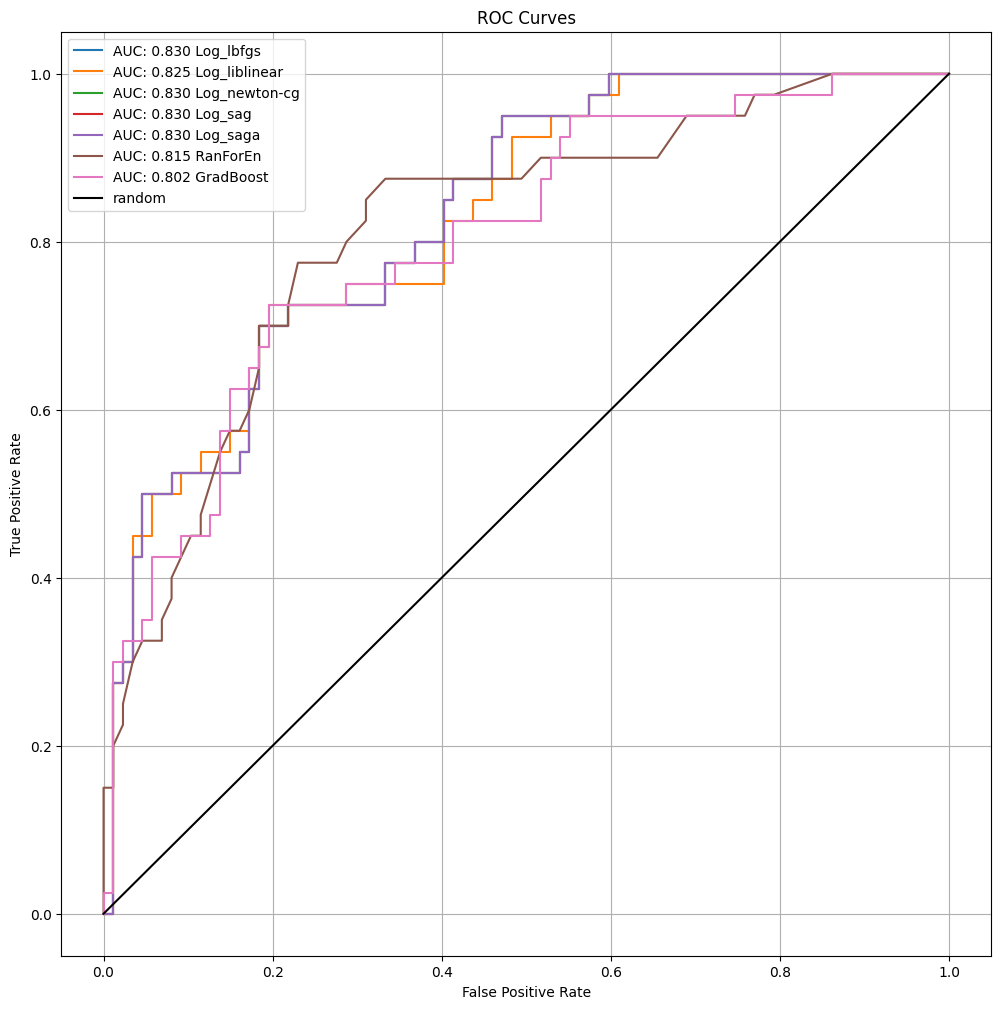

           model  true_neg  false_neg  false_pos  true_post  accuracy  \
0      Log_lbfgs        81         20          6         20  0.795276   
1  Log_liblinear        82         20          5         20  0.803150   
2  Log_newton-cg        81         20          6         20  0.795276   
3        Log_sag        81         20          6         20  0.795276   
4       Log_saga        81         20          6         20  0.795276   
5       RanForEn        77         22         10         18  0.748031   
6      GradBoost        75         17         12         23  0.771654   
7            SVC        80         21          7         19  0.779528   
8          NuSVC        78         21          9         19  0.763780   
9      LinearSVC        76         21         11         19  0.748031   

   precision_score  recall_score  f1_score  
0         0.769231         0.500  0.606061  
1         0.800000         0.500  0.615385  
2         0.769231         0.500  0.606061  
3         0.7692

In [52]:
# #Sources:
# https://towardsdatascience.com/understanding-data-science-classification-metrics-in-scikit-learn-in-python-3bc336865019
# https://scikit-learn.org/

from sklearn import metrics

# Empty dictionaries/lists to store metrics & info
all_models_metrics_list = []
all_models_roc_list = []

# Run each pipeline
for name, model in best_estimators_models.items():

    #Stage the Test data
    X_test1 = X_test[best_estimators_features[name]].copy()
    
    #Predict the Model
    y_pred = model.predict(X_test1)
    cm_tn, cm_fp, cm_fn, cm_tp = metrics.confusion_matrix(y_test, y_pred).ravel()

    # Store Metrics
    all_models_metrics_list.append({
        "model": name,
        'true_neg': cm_tn,
        'false_neg': cm_fn,
        'false_pos': cm_fp,
        'true_post': cm_tp,
        'accuracy': metrics.accuracy_score(y_test, y_pred), 
        'precision_score': metrics.precision_score(y_test, y_pred), 
        "recall_score": metrics.recall_score(y_test, y_pred),
        "f1_score": metrics.f1_score(y_test, y_pred)
    })
    
    # Store ROC Data
    if not name.endswith("SVC"):

        y_score = model.predict_proba(X_test)[:,1]
        roc_curve_fpr, roc_curve_tpr, roc_curve_threshold = metrics.roc_curve(y_test, y_score)

        all_models_roc_list.append((
            name, 
            roc_curve_fpr, 
            roc_curve_tpr, 
            roc_curve_threshold,
            metrics.roc_auc_score(y_test, y_score)
        ))


## Part IIIb Model evaluation: accuracy, precision, recall, F1-score, and ROC-AUC

In [ ]:
# Plot ROC Curves and display AUC
plt.figure(figsize=(12, 12))
for solver, fpr, tpr, threshold, auc in all_models_roc_list:
    auc = '{:.3f}'.format(auc)
    plt.plot(fpr, tpr, label=f'AUC: {auc} {solver}')
plt.plot([0,1],[0,1],'k-',label='random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.grid()
plt.show()

all_models_metrics_df = pd.DataFrame(all_models_metrics_list)
print(all_models_metrics_df)

Given that We would want the highest recall score, I would be going with the Gradien Boost Model




# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

1. The Gradient Boost Model will be the model we are selecting for this
2. Considering the Histograms, gluscose showed the greatest amount of change between those with and those without diabetes.
3. The zero values had to be excluded to avoid putting them into the model
4. No significant multicolinearity was injected into the model.